# Load all tweets

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
alltweets = pd.read_csv('/content/alltweets.csv')
alltweets.head()

,date,tweet_id,text,year
0,2021-02-04 02:18:30+00:00,1357151516428099587,is nars blush any good? sunnies face blush doe...,2021
1,2021-02-03 18:48:46+00:00,1357038337396142081,Lmfaoooooooo “can I sample deep throat” 😒😂 I f...,2021
2,2021-02-03 14:41:58+00:00,1356976226431197184,ㅤㅤ \nCategory is face and I won. \n\nPictorial...,2021
3,2021-02-03 14:36:55+00:00,1356974955666284546,Have you heard about the NARS orgasm blush? ht...,2021
4,2021-02-03 02:19:32+00:00,1356789387451789312,020221 : ELLE KOREA - LEEHI X NARS 'Dear. Darl...,2021


In [ ]:
alltweets.year.value_counts().sort_index()

2008      57
2009    1107
2010    4391
2011    6548
2012    8764
2013    9795
2014    7711
2015    7082
2016    3874
2017    2575
2018    2391
2019    1868
2020    1768
2021     171
Name: year, dtype: int64

In [ ]:
# filter out 2008 - 2013 data
tweets = alltweets[alltweets['year'] > 2013]
tweets.year.value_counts().sort_index()

2014    7711
2015    7082
2016    3874
2017    2575
2018    2391
2019    1868
2020    1768
2021     171
Name: year, dtype: int64

In [ ]:
# export csv of each year separately
start = 2014 
for i in range(8):
  df = tweets[tweets['year'] == start]
  filename = 'tweets_' + str(start) + '.csv'
  df.to_csv(filename, index=False)
  start += 1

In [ ]:
pd.set_option('display.max_colwidth', 700)
pd.set_option('max_rows', 200)
# pd.reset_option('display.max_colwidth')

# Tweets to remove: 
- tweets promoting/joining giveaways
- tweets with links (ie. YouTube video/blogs/sales etc.) --> cannot verify link content
- retweets as indicated by 'RT' --> original tweet would have been captured
- duplicated tweets
- any mention of 'Whitney Port' (could be spam tweet; appears almost every year)
- tweets sharing recent purchase (ie. "I just added this to my closet on Poshmark...")
- tweets sharing what the makeup on their face is (ie. stating a list of products) --> OOTD/MOTD/FOTD related
- tweets promoting sales of product


# Clean 2014

In [ ]:
tweets2014 = pd.read_csv('/content/tweets_2014.csv').dropna()
tweets2014

,date,tweet_id,text,year
0,2014-12-31 21:46:43+00:00,550407729425031168,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014.0
1,2014-12-31 18:27:05+00:00,550357489217466368,Review: NARS Orgasm Blush - YouTube #nars http://t.co/FTIbSziFat,2014.0
2,2014-12-31 18:11:21+00:00,550353531962548224,Flashback! : NARS New Attitude Blush Review http://t.co/MNK366AXu1 #beautychat #bbloggers,2014.0
3,2014-12-31 16:57:37+00:00,550334974692700160,#sephora #patone #marsala #eyeshadow and #lipstick #pencils #nars #paloma #bronzer #blush and #Nars… http://t.co/2XmKJm3vJH,2014.0
4,2014-12-31 14:45:08+00:00,550301636665823234,I used my #NARS #Ita brush more than any other brush in 2014. http://t.co/WosZhzHNSp #contour #Blush #highlight,2014.0
...,...,...,...,...
7707,2014-01-01 20:30:44+00:00,418479424682483712,Treated myself to my first HighEnd makeup! The NARS Orgasm blush and Chanel Vitalumiere Aqua! Whats your fave HighEnd Brands? #bbloggers,2014.0
7708,2014-01-01 19:53:09+00:00,418469966149853184,Just had my One Night Stand \n#makeup #beauty #nars #guybourdin #face #cheek #beautylish #blush… http://t.co/8YMWX6T0Dz,2014.0
7709,2014-01-01 19:07:17+00:00,418458425933041664,do i or don't i fork out on a nars bronzer and blush D:,2014.0
7710,2014-01-01 13:12:38+00:00,418369173509525504,"#5: NARS Blush, Orgasm 0.16 oz.: NARS Blush, Orgasm 0.16 oz. NARS (272)Buy new: $29.00 (Visit the Best Selle... http://t.co/pcQYfDCTjR",2014.0


In [ ]:
## evaluate by 100 
tweets2014.iloc[0:50]

,date,tweet_id,text,year
0,2014-12-31 21:46:43+00:00,550407729425031168,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014.0
1,2014-12-31 18:27:05+00:00,550357489217466368,Review: NARS Orgasm Blush - YouTube #nars http://t.co/FTIbSziFat,2014.0
2,2014-12-31 18:11:21+00:00,550353531962548224,Flashback! : NARS New Attitude Blush Review http://t.co/MNK366AXu1 #beautychat #bbloggers,2014.0
3,2014-12-31 16:57:37+00:00,550334974692700160,#sephora #patone #marsala #eyeshadow and #lipstick #pencils #nars #paloma #bronzer #blush and #Nars… http://t.co/2XmKJm3vJH,2014.0
4,2014-12-31 14:45:08+00:00,550301636665823234,I used my #NARS #Ita brush more than any other brush in 2014. http://t.co/WosZhzHNSp #contour #Blush #highlight,2014.0
5,2014-12-31 14:30:10+00:00,550297868641521665,Whitney Port loves NARS Orgasm Blush :),2014.0
6,2014-12-31 09:42:54+00:00,550225573188890624,"Two Of A Kind \n28"" x 48""\nCharcoal, NARS Blush, Pastel, India Ink, and acrylic on Walnut http://t.co/bQ2JPPx5hz",2014.0
7,2014-12-31 08:29:37+00:00,550207132205727745,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014.0
8,2014-12-31 06:17:40+00:00,550173928711127040,First NARS blush 😍😩 http://t.co/WzVZOKcw52,2014.0
9,2014-12-31 04:31:35+00:00,550147230557286400,And my Nars highlighting blush 💁,2014.0


In [ ]:
# obtained from inspection 
words14 = ['Whitney Port', 'review', 'Review', 'Swatches', 'NEW', 'REVIEW', 'oz', 'Preorder', 'INSTOCK', 'nstock', 'Beauty Tips', 'Giveaway', 'BEAUTY PRODUCTS', 'giveaway', 'GIVEAWAY', 'AMAZON HOT BEAUTY', 'Deals', 'Beauty Splurge', 'Guide', 'Free', 'Award Finalist', '#fashion NARS Models', '#Models', 'POST', 'Post', 'post', 'Beauty', 'BEAUTY', '@YouTube', 'Collection', 'RT', 'http']

In [ ]:
tweets2014['contains_word'] = tweets2014['text'].apply(lambda x: any(substr in x for substr in words14))
tweets2014 = tweets2014[tweets2014['contains_word'] == False]
tweets2014.drop_duplicates('text', inplace=True)
tweets2014.reset_index(drop=True, inplace=True) ## reduced from 7710 to 1764
tweets2014

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2014-12-31 21:46:43+00:00,550407729425031168,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014.0,False
1,2014-12-31 08:29:37+00:00,550207132205727745,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014.0,False
2,2014-12-31 04:31:35+00:00,550147230557286400,And my Nars highlighting blush 💁,2014.0,False
3,2014-12-31 04:16:32+00:00,550143441770799105,Got the NARS palette &amp; milani blush I wanted all for free shipping #iwin,2014.0,False
4,2014-12-31 00:16:59+00:00,550083158994325504,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,2014.0,False
...,...,...,...,...,...
1759,2014-01-01 23:26:48+00:00,418523731636408320,@clarkconquers nooooo! its a nars blush thats just the name!,2014.0,False
1760,2014-01-01 23:09:19+00:00,418519331920969728,Hi all. Question. Does anyone work at or has anyone been in a sephora that has one of the nars le blush palettes?,2014.0,False
1761,2014-01-01 20:30:44+00:00,418479424682483712,Treated myself to my first HighEnd makeup! The NARS Orgasm blush and Chanel Vitalumiere Aqua! Whats your fave HighEnd Brands? #bbloggers,2014.0,False
1762,2014-01-01 19:07:17+00:00,418458425933041664,do i or don't i fork out on a nars bronzer and blush D:,2014.0,False


In [ ]:
tweets2014.to_csv('tweets14_cleaned.csv', index=False)

# Clean 2015

In [ ]:
tweets2015 = pd.read_csv('/content/tweets_2015.csv').dropna()
tweets2015

,date,tweet_id,text,year
0,2015-12-31 23:00:00+00:00,682697744272637952,"The look my mom gave me when she read that the NARS blush shade I was buying \n""Orgasm""...\nI was very close to buying ""Super Orgasm""",2015.0
1,2015-12-31 22:33:10+00:00,682690989190823937,Really confused as to why the @NARSissist counter at @Bloomingdales gave me a @Sephora blush brush instead of the NARS one I paid for?,2015.0
2,2015-12-31 21:47:08+00:00,682679403462017024,"Makeup Collection Including Chanel Eyeshadow, Pink Blush, Nars… https://t.co/3SzeyKSLx1 https://t.co/1UDOL5xJw3",2015.0
3,2015-12-31 20:36:26+00:00,682661612621303808,"Essential: #23 Wet/Dry Blush Brush from NARS, this was specifically designed by them for the Dual In https://t.co/QP8WoWhYEJ",2015.0
4,2015-12-31 20:11:20+00:00,682655295940722688,My mom took my NARS lipstick &amp; left me her urban decay blush so I won't get mad LOL,2015.0
...,...,...,...,...
7078,2015-01-01 15:26:19+00:00,550674387473797120,Excited for my first nars blush #girlytweet,2015.0
7079,2015-01-01 11:03:54+00:00,550608349134598146,"Photo: stjame: Two Of A Kind 28” x 48” Charcoal, NARS Blush, Pastel, India Ink, and acrylic on Walnut http://t.co/8aBRgxxZIg",2015.0
7080,2015-01-01 08:05:31+00:00,550563457838612480,NARS Virtual Domination Blush Palette http://t.co/BjC6mT8uaq on @bloglovin,2015.0
7081,2015-01-01 06:20:16+00:00,550536967092731904,"NEW! NARS NARSissist Blush, Contour and Lip Palette http://t.co/wNb0nlsSy2",2015.0


In [ ]:
tweets2015.iloc[6050:6100]

,date,tweet_id,text,year
6052,2015-02-21 18:31:03+00:00,569202657962778624,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/dxIlD76uw0 Pls. ReTweet!",2015.0
6053,2015-02-21 18:31:02+00:00,569202654582214657,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/XFj4F3JiNB Pls. ReTweet!",2015.0
6054,2015-02-21 18:31:02+00:00,569202653097373696,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/ru0uldGm3K Pls. ReTweet!",2015.0
6055,2015-02-21 18:31:01+00:00,569202651239313408,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/BNuR9t0sLN Pls. ReTweet!",2015.0
6056,2015-02-21 18:31:01+00:00,569202649037348865,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/CbwWmIG5Qw Pls. ReTweet!",2015.0
6057,2015-02-21 18:31:01+00:00,569202647812608001,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/kbjHIy9eJB Pls. ReTweet!",2015.0
6058,2015-02-21 18:31:00+00:00,569202644855566336,"DouglasECastleFLASH My tweets: Fri, 12:15: BeautyTips&amp;Tales NARS Dual-Intensity Blush for Sprin... http://t.co/5Cu7eItbTz Pls. ReTweet!",2015.0
6059,2015-02-21 18:16:43+00:00,569199051985567744,Can't wait to get my hands on the new blush from NARS this Spring 😍😱 #bbloggers,2015.0
6060,2015-02-21 16:45:26+00:00,569176079778377729,Beauty obsession of the week: Nars blush in orgasm! Why we love it: http://t.co/qomPOM4tGI,2015.0
6061,2015-02-21 16:15:48+00:00,569168620389052416,"@xpeonyprojectx yeah. I have a Nars palette that has blush, bronzer &amp; 4 eyeshadow which is great for travelling! X",2015.0


In [ ]:
words15 = ['Whitney Port', 'http', 'review', 'Review', 'NEW', 'REVIEW', 'Swatches', 'SALE', 'oz', 'iveaway', 'GIVEAWAY', 'PRICE', 'Create Your Best', 'Win', 'win', 'WIN', 'RT', '@YouTube', 'DouglasECastleFLASH', 'Sneak Peek', 'BeautyTips', '#Model']

In [ ]:
tweets2015['contains_word'] = tweets2015['text'].apply(lambda x: any(substr in x for substr in words15))
tweets2015 = tweets2015[tweets2015['contains_word'] == False]
tweets2015.drop_duplicates('text', inplace=True)
tweets2015.reset_index(drop=True, inplace=True) ## reduced from 7081 to 1284
tweets2015

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2015-12-31 23:00:00+00:00,682697744272637952,"The look my mom gave me when she read that the NARS blush shade I was buying \n""Orgasm""...\nI was very close to buying ""Super Orgasm""",2015.0,False
1,2015-12-31 22:33:10+00:00,682690989190823937,Really confused as to why the @NARSissist counter at @Bloomingdales gave me a @Sephora blush brush instead of the NARS one I paid for?,2015.0,False
2,2015-12-31 20:11:20+00:00,682655295940722688,My mom took my NARS lipstick &amp; left me her urban decay blush so I won't get mad LOL,2015.0,False
3,2015-12-31 14:45:25+00:00,682573278305759232,"nars has a blush named ""deep throat"" and i'm contemplating buying it strictly for its name lol",2015.0,False
4,2015-12-31 05:16:26+00:00,682430086000295936,Really really want a nars blush 😊,2015.0,False
...,...,...,...,...,...
1279,2015-01-02 04:25:20+00:00,550870433386360832,.@Fat_berry My makeup is all sexual. Lipstick is YSL Rouge Ecstasy. Blush is Nars Deep Throat. And a cheek illuminator called Orgasm. Weird,2015.0,False
1280,2015-01-01 23:07:47+00:00,550790516799860737,"@RunningTracy NARS blush is so great! It stays on forever (or until you forget to wash your face, go to bed, and it stays on your pillow)",2015.0,False
1281,2015-01-01 21:55:05+00:00,550772222240243713,Ordered NARS Blush 😍,2015.0,False
1282,2015-01-01 15:26:19+00:00,550674387473797120,Excited for my first nars blush #girlytweet,2015.0,False


In [ ]:
tweets2015[1000:1200]

,date,tweet_id,text,year,contains_word
1000,2015-03-11 20:20:24+00:00,575753158376493056,Aw Bob Saget! I broke my favourite NARS blush. :x,2015.0,False
1001,2015-03-11 16:27:00+00:00,575694419019456512,Is there a dupe for NARS blush in 'Deep Throat' that's matte/satin? #beauty,2015.0,False
1002,2015-03-09 14:36:09+00:00,574941750860455937,@cmdr_handsome @shinjela its The Blowjob. gives the most natural blush finish rivaling NARS' orgasm,2015.0,False
1003,2015-03-09 04:50:10+00:00,574794282776686592,Finally got Nars orgasm blush and Laguna bronzer duo 😍👌,2015.0,False
1004,2015-03-09 03:56:55+00:00,574780882004877312,Orgasm blush by Nars is the prettiest.,2015.0,False
1005,2015-03-09 00:15:22+00:00,574725126001983488,"I own a lot of NARS actually. Lip gloss, lipstick, eyeshadow, contour/highlighter, blush, and bronzer.",2015.0,False
1006,2015-03-08 18:59:00+00:00,574645508045697024,“@BendItLikeBrook: NARS make-up is Bomb Diggity. But it's so expensive. 😩”yessss I live by my dolce vita blush,2015.0,False
1007,2015-03-08 15:16:24+00:00,574589488489439232,Lost my Nars blush palette - actually fuming,2015.0,False
1008,2015-03-08 08:09:50+00:00,574482140965941248,@twituserjacks that's a bummer -- ive never used NARS blush before so this will be a first,2015.0,False
1009,2015-03-07 11:18:18+00:00,574167183003115521,I dreamt I bought a Nars Dual intensity blush and was about to blog about it.. is it meant to be? #bbloggers #narsissist #beautyaddict,2015.0,False


In [ ]:
tweets2015.to_csv('tweets15_cleaned.csv', index=False)

# Clean 2016
*may need to reupload file to be able to load*

In [ ]:
tweets2016 = pd.read_csv('/content/tweets_2016.csv', engine='python').dropna()
tweets2016

,date,tweet_id,text,year
0,2016-12-31 20:06:34+00:00,8.152881e+17,NARS Blush - Exhibit A 4.8g/0.16oz Make Up https://t.co/PnnUeZusH3 #beauty https://t.co/RW0yAMt9Be,2016.0
1,2016-12-31 17:41:49+00:00,8.152516e+17,@callieannej it's just a Mary Kay one but I also bought a It's Cosmetics concealer and a NARS blush,2016.0
2,2016-12-31 01:34:23+00:00,8.150082e+17,NARS Spring 2017 Wildfire Collection Review #NARSissist #NARS #makeup #beauty #spring2017beauty #eyeshadow #blush https://t.co/v4WkSCwYDU,2016.0
3,2016-12-30 23:53:15+00:00,8.149827e+17,The new NARS blush palette is beautiful! 😍#new #nars #blush #palette #beautiful #makeup https://t.co/iAUXFHoonI,2016.0
4,2016-12-30 23:01:57+00:00,8.149698e+17,"i just saw a youtube video titled ""nars organism blush"" i'm done",2016.0
...,...,...,...,...
3873,2016-01-01 13:09:36+00:00,6.829115e+17,But in my dream I bought the nars orgasm blush so,2016.0
3874,2016-01-01 12:30:44+00:00,6.829018e+17,Greatest heartbreak @nars discontinued my blush contour 😩😭,2016.0
3875,2016-01-01 05:49:31+00:00,6.828008e+17,Whitney Port loves NARS Orgasm Blush :),2016.0
3876,2016-01-01 02:20:16+00:00,6.827481e+17,"I added a video to a @YouTube playlist https://t.co/swshyqit5d Contour+ Highlighting+ Blush &amp; GLOW Secrets REVEALED 101! |DUPES, NARS",2016.0


In [ ]:
words16 = ['http', 'review', 'Review', 'watches', 'REVIEW', 'RT', '@YouTube', 'iveaway', 'GIVEAWAY', 'post', 'oz', 'Oz', 'closet', 'Poshmark', 'New', 'NEW', 'WIN', 'Best Price', 'free', 'SALE', 'sale', 'NARS Summer', 'Launching', 'NARS Liberation Dual', 'Two Women', 'Nars The Multiple Blush', 'Whitney Port ', 'Check', 'Spring 2016']

In [ ]:
tweets2016['contains_word'] = tweets2016['text'].apply(lambda x: any(substr in x for substr in words16))
tweets2016 = tweets2016[tweets2016['contains_word'] == False]
tweets2016.drop_duplicates('text', inplace=True)
tweets2016.reset_index(drop=True, inplace=True) ## reduced from 3872 to 1286
tweets2016

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2016-12-31 17:41:49+00:00,8.152516e+17,@callieannej it's just a Mary Kay one but I also bought a It's Cosmetics concealer and a NARS blush,2016.0,False
1,2016-12-30 23:01:57+00:00,8.149698e+17,"i just saw a youtube video titled ""nars organism blush"" i'm done",2016.0,False
2,2016-12-30 05:45:50+00:00,8.147091e+17,@GirlinthePages NARS blush palettes are some of the best investments I've made ever so I fully support this,2016.0,False
3,2016-12-30 05:45:02+00:00,8.147089e+17,@diamondxgirl Just got my NARS Unfiltered II blush palette in the mail today and trying to convince myself I don't need the other one too XD,2016.0,False
4,2016-12-30 00:42:22+00:00,8.146327e+17,@actinghes kat von d liquid lipsticks or nars blush. Can't go wrong there :),2016.0,False
...,...,...,...,...,...
1281,2016-01-02 06:34:56+00:00,6.831746e+17,"I'm thinking neutral lids, my signature wing, nars orgasm blush, and Mac solar on my lips thank u",2016.0,False
1282,2016-01-01 19:36:41+00:00,6.830090e+17,@JanMarie__ NARS is BOOOOMB. Lip colors and blush,2016.0,False
1283,2016-01-01 18:51:15+00:00,6.829975e+17,@shnelldor then nars Laguna bronzer or Mac Swiss choc blush then I used different highlight powders all the time but ma fave is Laura Mercia,2016.0,False
1284,2016-01-01 13:09:36+00:00,6.829115e+17,But in my dream I bought the nars orgasm blush so,2016.0,False


In [ ]:
tweets2016.to_csv('tweets16_cleaned.csv', index=False)

# Clean 2017

In [ ]:
tweets2017 = pd.read_csv('/content/tweets_2017.csv').dropna()
tweets2017

,date,tweet_id,text,year
0,2017-12-31 21:01:01+00:00,947573329204039680,@RaevynnTalia Yes love!!! I like to try out new bronzers I have a few favorites but I LOVE NARS blush😍,2017
1,2017-12-31 14:57:56+00:00,947481957432283137,"before I go and spend 35$ on a NARS blush, has anybody tried it &amp; if so do you think it was worth the price ?",2017
2,2017-12-31 07:41:35+00:00,947372147521081344,“Orgasm” by NARS First blush I ever used.. back when the name made me giggle.. … https://t.co/fRSq62wnQa https://t.co/l2MnhMkHgc,2017
3,2017-12-31 03:14:04+00:00,947304824101593088,"@NARSCosmetics Foundation Stick &amp; Concealer. @ABHcosmetics Contour Kit. @tartecosmetics Paaarty Blush, Toasted Palette, Chrome Paint Pot, Brow Pencil, Brow Mousse, &amp; Quick Dry Lip Paint. @LancomeUSA Highlighter &amp; Monseiur Big Mascara. #NARS #abhfam #TARTE #lancome #mua https://t.co/zQZkbMXCMO",2017
4,2017-12-31 02:51:21+00:00,947299104215924736,@pickmanyabean @Sephora I BOUGHT A FENTY BEAUTY CONTOUR/CONCEAL/HIGHLIGHT TRIO AND THE NARS ORGASM BLUSH,2017
...,...,...,...,...
2570,2017-01-01 20:10:58+00:00,815651550181756928,||NARS Dupe|| 🚨This is one of the closest dupes I've found for @narsissist orgasm blush - the… https://t.co/PbpjLpSbvQ,2017
2571,2017-01-01 20:10:15+00:00,815651370199969792,||NARS Dupe|| 🚨This is one of the closest dupes I've found for @narsissist orgasm blush - the… https://t.co/MaxOhO11Qj,2017
2572,2017-01-01 16:41:01+00:00,815598714169528320,My mom just threw away my orgasm NARS blush and.....idk what to say to her now,2017
2573,2017-01-01 05:15:38+00:00,815426231697022977,⚡️⚡️⚡️DUPE ALERT⚡️⚡️⚡️ \n\nNYX's Ombre Blush in Mauve Me is a close match the NARS Blush… https://t.co/9j0hwE6bJC,2017


In [ ]:
words17 = ['Whitney Port', 'http', 'review', 'Review', 'watches', 'REVIEW', 'STOCK', 'Pre-Order', 'closet', 'Collection', 'WIN', 'RT', 'Warning', '@YouTube', 'post', 'iveaway', 'GIVEAWAY']

In [ ]:
tweets2017['contains_word'] = tweets2017['text'].apply(lambda x: any(substr in x for substr in words17))
tweets2017 = tweets2017[tweets2017['contains_word'] == False]
tweets2017.drop_duplicates('text', inplace=True)
tweets2017.reset_index(drop=True, inplace=True) ## reduced from 2575 to 740
tweets2017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2017-12-31 21:01:01+00:00,947573329204039680,@RaevynnTalia Yes love!!! I like to try out new bronzers I have a few favorites but I LOVE NARS blush😍,2017,False
1,2017-12-31 14:57:56+00:00,947481957432283137,"before I go and spend 35$ on a NARS blush, has anybody tried it &amp; if so do you think it was worth the price ?",2017,False
2,2017-12-31 02:51:21+00:00,947299104215924736,@pickmanyabean @Sephora I BOUGHT A FENTY BEAUTY CONTOUR/CONCEAL/HIGHLIGHT TRIO AND THE NARS ORGASM BLUSH,2017,False
3,2017-12-31 02:42:19+00:00,947296831452696577,I only have one blush and that’s Orgasm by Nars and it’s probably the only one I’ll ever own lol,2017,False
4,2017-12-30 06:52:13+00:00,946997336084955136,"@SOnufrichuk The new Huda pallet, it’s an investment but defs worth it. Orgasm blush by Nars or the tarte party blush",2017,False
...,...,...,...,...,...
735,2017-01-02 19:32:20+00:00,816004215826944001,Mfw my mom uses NARS blush brush to put baby powder in her hair,2017,False
736,2017-01-02 18:51:11+00:00,815993860161761281,"@SATANPLSS if you want a high end good blush, go with becca or nars. the only blush i use is the becca jaclyn face palette ones",2017,False
737,2017-01-02 02:37:08+00:00,815748733606490112,youtube beauty blogger: Now I'm just gonna go in lightly with this Nars blush in *squints to read label on the back* Deepthroat!,2017,False
738,2017-01-02 00:58:54+00:00,815724013683089408,"(said in front of my mother, referring to my NARS blush, spoken without thinking)\nme: I can't find my orgasm!",2017,False


In [ ]:
tweets2017[600:]

,date,tweet_id,text,year,contains_word
600,2017-02-23 22:46:27+00:00,834897238291857411,Finally Ulta carries NARS I needed dat orgasm blush,2017,False
601,2017-02-23 22:31:27+00:00,834893459626541056,@_FRO1o NARS sin blush,2017,False
602,2017-02-23 20:56:06+00:00,834869467138183172,@HelloTerriLowe how much do you want for the nars blush?,2017,False
603,2017-02-23 18:21:18+00:00,834830509989572610,ben nars orgasm sen essence silky touch blush o yüzden get out of my sight!,2017,False
604,2017-02-22 23:45:57+00:00,834549821188952065,NARS laguna bronzer &amp; orgasm blush look beautiful asf someone buy me them,2017,False
605,2017-02-22 20:36:55+00:00,834502251649589251,"@haleyyyann_ NARS has a good contour thing! It's only the bronzer and a light blush, it's the booomb",2017,False
606,2017-02-22 18:13:27+00:00,834466147345059843,i randomly found an amazing dupe for nars orgasm blush in an old palette i have and it's made my day,2017,False
607,2017-02-22 17:42:17+00:00,834458304323661825,"@sarajmua it's NARS Exhibit A Blush actually, but it works so well as an eyeshadow 😍",2017,False
608,2017-02-22 03:56:46+00:00,834250554608070656,@prep_girly girl get you the nars super orgasm blush,2017,False
609,2017-02-21 23:12:20+00:00,834178976692068352,"I cracked my Nars ""orgasm"" blush :-( I'm gonna kms 😫😫😫😫😫😫",2017,False


In [ ]:
tweets2017.to_csv('tweets17_cleaned.csv', index=False)

# Clean 2018

In [ ]:
tweets2018 = pd.read_csv('/content/tweets_2018.csv').dropna()
tweets2018

,date,tweet_id,text,year
0,2018-12-31 19:03:51+00:00,1079815413788102656,"Available Now! 🚨LINK ➡️ https://t.co/EkEatodh20 online @ultabeauty ✨😍\nMore #elfcosmetics items: brushes, skincare, primer, blush, bronzer, mascara...\nAlso more items by #CoverFx :\nPower Play Foundation, the New Primers, complexion kit\nAnd #Nars New Skin Deep Eyeshadow Palette https://t.co/iV5XEZIGDW",2018
1,2018-12-31 03:57:48+00:00,1079587398298685441,"@womanfeeds Bb cream/foundie : it cosmetics cc cream\nBlush on : nars &amp; glossier \nLoose/compact powder : blp &amp; laura mercier \nAlis : benefit \nMascara : kiss me &amp; benefit &amp; glossier \nLiptint/lipstick/lip cream : dior, make over , nars \nBronzer : benefit",2018
2,2018-12-30 22:04:13+00:00,1079498417607491585,"#ontheblog , NARS Blush Review! Read the deets &amp; peek the swatches! Link in my bio. https://t.co/r5tOCjOPCz https://t.co/PWj0EcWu1T",2018
3,2018-12-30 14:56:21+00:00,1079390743217737729,"@BritishVogue @ArianaGrande The highlight I did for a 1996 Guess Campaign, and the highlight for Nicole Scherzinger I did for the 2006 (Buttons) video (Glycerin &amp; Nars blush). My point is it's nobodies ""iconic"" tribute, and been done for ages. I got the idea from an old @BarbraStreisand film. Cheers! https://t.co/jx0uyy0UlP",2018
4,2018-12-30 13:30:19+00:00,1079369088768589824,"New Products (NARS Intensely Blush Review, Photos, Swatches) has been published on Truly Fair Cosmetics - https://t.co/zYUEJemBtP",2018
...,...,...,...,...
2386,2018-01-01 19:19:15+00:00,947910108310327297,forgot how much I loved Nars blush until this weekend 😍,2018
2387,2018-01-01 18:22:56+00:00,947895932577861632,I want to win a NARS x Man Ray Love Triangle Blush/Lipstick Set with @Prettifulblog https://t.co/39CyCbJs4j,2018
2388,2018-01-01 16:55:35+00:00,947873950796677120,I just added this to my closet on Poshmark: NARS Dual Intensity Blush - Adoration. https://t.co/H3ctE6oh3Z via @poshmarkapp #shopmycloset,2018
2389,2018-01-01 12:06:56+00:00,947801309305909249,Must have items 2018 🌈\n- benefit blush kit - peripera - ysl - too face - kiss beauty - nars - 3ce - babysisterbodylotion #HowtoPerfect #พรีออเดอร์เกาหลี #howtobeauty #ใช้ดีบอกต่อ https://t.co/zXnrcVDzky,2018


In [ ]:
words18 = ['OZ', 'oz', 'Oz', 'http', '@YouTube', 'closet', 'Collection', 'RT', 'review', 'Review', 'REVIEW', 'Whitney Port', 'Free', 'FREE', 'Unsung Makeup Heroes', 'watches', 'iveaway', 'GIVEAWAY', 'win', 'Rp 150.000', 'Khmer Rouge']

In [ ]:
tweets2018['contains_word'] = tweets2018['text'].apply(lambda x: any(substr in x for substr in words18))
tweets2018 = tweets2018[tweets2018['contains_word'] == False]
tweets2018.drop_duplicates('text', inplace=True)
tweets2018.reset_index(drop=True, inplace=True) ## reduced from 2391 to 893
tweets2018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2018-12-31 03:57:48+00:00,1079587398298685441,"@womanfeeds Bb cream/foundie : it cosmetics cc cream\nBlush on : nars &amp; glossier \nLoose/compact powder : blp &amp; laura mercier \nAlis : benefit \nMascara : kiss me &amp; benefit &amp; glossier \nLiptint/lipstick/lip cream : dior, make over , nars \nBronzer : benefit",2018,False
1,2018-12-30 10:37:40+00:00,1079325642661871617,"You're not worth my tears. I wore fucking nars blush, and i wont ruin it with my tears run over it.. Ty, next.",2018,False
2,2018-12-30 03:24:02+00:00,1079216515969372160,@equestrian_poll I love NARS for blush but Estée Lauder has the best foundation! I use Double Wear and it’s extremely light but still has good coverage. I blend it with a sponge.,2018,False
3,2018-12-30 00:38:02+00:00,1079174739040526336,"@womanfeeds Liptint : mayb, emina, etude, BLP lipstain\nLoose powder : RCMA atauga airspun\nMaskara : mayb total temptation, lash paradise, mayb hypercurl\nBlush on : makeover, emina, nyx, mayb, colourpop, milani, focallure dan lupa\nFoundation : mayb, makeover, nars",2018,False
4,2018-12-30 00:17:20+00:00,1079169528951721985,@Angeschka For sure. People hated that NARS Hot Tryst palette bc the blushes “weren’t pigmented.” This was a huge selling point for my pale ass who does not *want* a super pigmented blush. (But then it was sold out everywhere and I’m so sad I missed it!!! 😣😣😣 Still sad about it.),2018,False
...,...,...,...,...,...
888,2018-01-03 16:36:56+00:00,948594034779611142,@Dalieshasux That’s a blush by nars,2018,False
889,2018-01-03 13:51:48+00:00,948552478370488320,I want the nars exhibit A blush so bad 😭,2018,False
890,2018-01-02 21:37:07+00:00,948307191991324672,"@hallenhayes I’m gonna have to try that one next! I’m still stuck on my NARS blush right now, but that is the exact highlighter I’m using, it last foreverrrr and is freakin amazing. 😍✨",2018,False
891,2018-01-02 03:22:02+00:00,948031602763767808,i really love tarte blushes and that nars orgasm blush,2018,False


In [ ]:
tweets2018[800:]

,date,tweet_id,text,year,contains_word
800,2018-01-31 13:16:55+00:00,958690558121271296,Ayyyyye I just peeped Drake’s NARS Orgasm blush reference in Fancy💕 ✊🏼,2018,False
801,2018-01-31 06:01:45+00:00,958581047582711813,@saturnbeam FOR THE PRICE OF A MCCHICKEN DJOFMXSINHDM. It incites me to buy an annual expensive blush from Nars tho to expand my collection without hoarding. It's the expensive silver lining.,2018,False
802,2018-01-31 00:43:24+00:00,958500929061474305,currently staring at the nars orgasm blush uhh shes beautiful im stoked to wear,2018,False
803,2018-01-30 12:46:27+00:00,958320501788758017,I’m def excited about the new NARS blush palettes and new highlighter formula,2018,False
804,2018-01-30 12:38:19+00:00,958318458072174592,Probably going to skip that cream blush for one of those new NARS cheek palettes.,2018,False
805,2018-01-30 01:29:59+00:00,958150265516933120,@VTan2414 Nars orgasm is gonna be ur fave blush,2018,False
806,2018-01-29 22:14:29+00:00,958101064984743938,@BeautyHourIE @PushMakeup Nars orgasm blush is hard to beat for pale complexions. Also love the Balm blushers.,2018,False
807,2018-01-28 22:34:12+00:00,957743639492550656,"If I wasn't trying to be smart about my beauty purchases, I'd buy a Nars blush called ""Deep Throat"" just because I'm 12",2018,False
808,2018-01-27 07:24:03+00:00,957152205785784321,@JHSMlCDROP Hun this is the NARS Blush palette but yes same! Lol,2018,False
809,2018-01-26 20:29:42+00:00,956987534470537216,@KathleenLights1 Lorac POREfecction primer; colourpop&amp; alexis rein bronzer duo; essence make me brow gel; nars satin lip pencil shade Rikugien; make up revolution blush in nude,2018,False


In [ ]:
tweets2018.to_csv('tweets18_cleaned.csv', index=False)

# Clean 2019

In [ ]:
tweets2019 = pd.read_csv('/content/tweets_2019.csv').dropna()
tweets2019

,date,tweet_id,text,year
0,2019-12-31 22:48:04+00:00,1212143411630759936,Click on the link to get a great deal on this NARS blush! #makeup #blush #TuesdayThoughts #NewYears #NewYearChallenge #Poshmark #deals #NARS https://t.co/LI8ScTbtbd,2019
1,2019-12-31 22:25:48+00:00,1212137806987960320,"Sometimes the light is just right. I'm wearing @fentybeauty Pro Filt'r Hydrating Longwear Foundation, @NARSCosmetics blush in Orgasm and @patmcgrathreal BlitzTrance lipstick in Love Train. #beauty #cosmetics #makeup #motd #fotd #patmcgrath #fentybeauty #nars https://t.co/b2lPUCq7ON",2019
2,2019-12-31 21:34:52+00:00,1212124990360805377,Check out what I just added to my closet on Poshmark: NARS Sun blush. https://t.co/MClOZEWmgA via @poshmarkapp #shopmycloset,2019
3,2019-12-31 21:27:27+00:00,1212123124310794240,Check out what I just added to my closet on Poshmark: NARS- Blush in Torrid. https://t.co/fbjJlAJYiv via @poshmarkapp #shopmycloset,2019
4,2019-12-31 21:08:06+00:00,1212118254103121920,Check out what I just added to my closet on Poshmark: NARS Blush in Outlaw. https://t.co/7DI92ESqNx via @poshmarkapp #shopmycloset,2019
...,...,...,...,...
1863,2019-01-02 04:42:29+00:00,1080323419034607616,When the beauty advisor recommended her NARS' blush in the whole….,2019
1864,2019-01-01 22:48:05+00:00,1080234231836614656,"I added a video to a @YouTube playlist https://t.co/DsqsMnCPcI Contour+ Highlighting+ Blush &amp; GLOW Secrets REVEALED 101! |DUPES, NARS",2019
1865,2019-01-01 20:06:18+00:00,1080193517421359104,"~The Balm in ""Hot Mama"" [$19] \n~Nars blush in ""Orgasm"" [$30] https://t.co/5cfuZr7R2i",2019
1866,2019-01-01 05:32:05+00:00,1079973516026564610,💛\n•Smashbox photo finish foundation primer ($16)\nDUPE: Elf mineral face primer ($6)\n💛\n•NARS “orgasm” blush ($30)\nDUPE: Milani’s “luminoso bakes blush” ($9),2019


In [ ]:
words19 = ['http', 'closet', 'Sale', 'New Arrival', 'RT', 'review', 'Review', 'watches', 'REVIEW', 'iveaway', 'GIVEAWAY', '@YouTube', 'Cash Back', 'New', 'Whitney Port']

In [ ]:
tweets2019['contains_word'] = tweets2019['text'].apply(lambda x: any(substr in x for substr in words19))
tweets2019 = tweets2019[tweets2019['contains_word'] == False]
tweets2019.drop_duplicates('text', inplace=True)
tweets2019.reset_index(drop=True, inplace=True) ## reduced from 1868 to 858
tweets2019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2019-12-31 10:28:18+00:00,1211957245061169153,Eye: Chique Cosmetics Le Macaroons Palette\nBlush: Nars Orgasm\nLips: Kamelia Melody + Mermaid Tears,2019,False
1,2019-12-31 03:48:35+00:00,1211856652066082816,@naturallychic_ They NARS blush is everything,2019,False
2,2019-12-30 23:20:01+00:00,1211789065814560768,@skoolgrlq NARS has the best blush,2019,False
3,2019-12-30 22:02:24+00:00,1211769530575413249,i never bothered with nars orgasm blush until it came in rose gold packaging and best believe i snapped that shit up,2019,False
4,2019-12-30 20:52:27+00:00,1211751927647739904,I have been using the same blush for 10 years NARS - Lovejoy,2019,False
...,...,...,...,...,...
853,2019-01-02 19:27:17+00:00,1080546088266813440,"@MichaleaLynn Dior’s velvet noire mascara, body shop’s vitamin E moisturizer, FAB’s coconut somthing priming moisturizer bc I have dryer skin, and nars’ orgasm blush or any of milani’s blushes or colourpop has good ones tooooo yayayay",2019,False
854,2019-01-02 16:54:14+00:00,1080507571881025537,@___d0minique Nars Radiant Longwear \nEstée Lauder double wear \nSephora Microsmooth\nLaneige Lip Sleeping mask\nJuvias Blush palette 2 \nHangover Primer,2019,False
855,2019-01-02 04:42:29+00:00,1080323419034607616,When the beauty advisor recommended her NARS' blush in the whole….,2019,False
856,2019-01-01 05:32:05+00:00,1079973516026564610,💛\n•Smashbox photo finish foundation primer ($16)\nDUPE: Elf mineral face primer ($6)\n💛\n•NARS “orgasm” blush ($30)\nDUPE: Milani’s “luminoso bakes blush” ($9),2019,False


In [ ]:
tweets2019.to_csv('tweets19_cleaned.csv', index=False)

# Clean 2020

In [ ]:
tweets2020 = pd.read_csv('/content/tweets_2020.csv').dropna()
tweets2020

,date,tweet_id,text,year
0,2020-12-31 23:56:53+00:00,1344794686959964160,"@kcroninfurman Oh wow, I can practically see the Nars blush and Stila e/s.",2020
1,2020-12-31 22:48:30+00:00,1344777481157373953,Okay but NARS’s blush in organs is my new fav,2020
2,2020-12-31 20:22:22+00:00,1344740704229220352,@_KRVSX NARS orgasm blush is 💥💥💥💥💥💥💥💥💥💥💥💥💣💣,2020
3,2020-12-30 15:24:30+00:00,1344303356819419136,That NARS ‘Orgasm’ blush gone do it every time.,2020
4,2020-12-30 03:56:43+00:00,1344130268823613440,"@ohmybeautybank Cushion / bedak : Focallure loose pwoder, BenNye loose powder\nBb cream / foundation : nars\nEyeshadow : Sephora\nPensil alis : implora shade brown\nMaskara : Maybelline \nEyeliner : lupa lgi \nBlush on : sephora\nPrimer : nyx\nConcealer : Maybelline fit me, too faced",2020
...,...,...,...,...
1763,2020-01-02 22:30:25+00:00,1212863745929760768,Nars orgasm blush 💋🎁,2020
1764,2020-01-02 18:46:59+00:00,1212807516393852928,Check out what I just added to my closet on Poshmark: NARS Orgasm Blush. https://t.co/6188oXUCPN via @poshmarkapp #shopmycloset,2020
1765,2020-01-02 05:02:14+00:00,1212599962069913600,"Maybelline fit me blush for me issa dupe for nars orgasm blush. The colour, the shimmer almost identical. I nampak mcm sama je tpi k la I'm gonna say like 90% same?. So if u wanna save your bucks, go for this drugstore brand &amp; get maybelline fit me blush in shade peach instead https://t.co/iNpnIMSaqI",2020
1766,2020-01-01 18:34:54+00:00,1212442087330729984,Nars orgasm blush is the best blush of alll time.,2020


In [ ]:
words20 = ['Whitney Port', 'oz', 'Oz', 'Collection', 'http', 'RT', 'review', 'Review', 'watches', 'REVIEW', 'iveaway', 'GIVEAWAY', '@YouTube', '@eBay', 'new', 'New', 'Check out', 'closet', 'Deal', 'deal', 'Product list', 'ASOS', 'free', 'Free', 'post', 'PRE-ORDER']

In [ ]:
tweets2020['contains_word'] = tweets2020['text'].apply(lambda x: any(substr in x for substr in words20))
tweets2020 = tweets2020[tweets2020['contains_word'] == False]
tweets2020.drop_duplicates('text', inplace=True)
tweets2020.reset_index(drop=True, inplace=True) ## reduced from 1768 to 913
tweets2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,tweet_id,text,year,contains_word
0,2020-12-31 23:56:53+00:00,1344794686959964160,"@kcroninfurman Oh wow, I can practically see the Nars blush and Stila e/s.",2020,False
1,2020-12-31 20:22:22+00:00,1344740704229220352,@_KRVSX NARS orgasm blush is 💥💥💥💥💥💥💥💥💥💥💥💥💣💣,2020,False
2,2020-12-30 15:24:30+00:00,1344303356819419136,That NARS ‘Orgasm’ blush gone do it every time.,2020,False
3,2020-12-30 03:56:43+00:00,1344130268823613440,"@ohmybeautybank Cushion / bedak : Focallure loose pwoder, BenNye loose powder\nBb cream / foundation : nars\nEyeshadow : Sephora\nPensil alis : implora shade brown\nMaskara : Maybelline \nEyeliner : lupa lgi \nBlush on : sephora\nPrimer : nyx\nConcealer : Maybelline fit me, too faced",2020,False
4,2020-12-30 00:12:10+00:00,1344073757187518466,Thought #Seduction was discontinued for years. Just cut out the middle man and ordered directly from #NARS along with an awesome eye shadow palette #NarsBlush #NarsSeduction @NARSCosmetics #TreatYourself #NarsCosmetics #NarsCosmeticsCanada #Makeup #Blush #ExtremeEffects 👄 😘,2020,False
...,...,...,...,...,...
908,2020-01-03 16:32:35+00:00,1213136079928193025,"@___d0minique La neige lip sleeping mask (I use it as balm all day), benefit precisely my brow pencil, too faced concealer (I’m using it more than NARS), NARS exhibit A blush.",2020,False
909,2020-01-02 23:58:06+00:00,1212885809851961351,@SaPe00265 Nars concealer n blush fenty face powder,2020,False
910,2020-01-02 22:30:25+00:00,1212863745929760768,Nars orgasm blush 💋🎁,2020,False
911,2020-01-01 18:34:54+00:00,1212442087330729984,Nars orgasm blush is the best blush of alll time.,2020,False


In [ ]:
tweets2020.to_csv('tweets20_cleaned.csv', index=False)

In [ ]:
tweets2020[100:300]

,date,tweet_id,text,year,contains_word
100,2020-11-19 10:39:28+00:00,1329373720113147905,"@kyo_official Nars'blush on, BBB'lip???",2020,False
101,2020-11-17 20:47:08+00:00,1328801870412980225,@snackieonassis_ Stop I literally use Nars Orgasm Blush to this day,2020,False
102,2020-11-17 00:37:55+00:00,1328497560223354880,@athenalecter me looking at the nars blush shade names searching for possible answers 😳😳😳,2020,False
103,2020-11-16 18:02:17+00:00,1328397995507929091,Why is nars liquid blush $30😩,2020,False
104,2020-11-16 03:34:35+00:00,1328179633997705221,"@IvankaTrump @realDonaldTrump Your dad wanted to go to ""Nars"". Take him to Nars store and get him a blush called ""Orgasm"". It might enhance his orange skin. \n\nIf you and your family (Please include your dad &amp; brothers) planning on moving to ""Mars"", I think that would be an wonderful idea!!\n#ConcedeNowTrump",2020,False
105,2020-11-14 21:28:33+00:00,1327725130978643968,accepting glossier cloud paint or nars cream blush as a super late birthday gift bc shit’s too pretty and too expensive,2020,False
106,2020-11-14 17:28:47+00:00,1327664791608037376,i love the nars blush shade names🥺 iykyk,2020,False
107,2020-11-13 19:28:05+00:00,1327332425370923008,@katie_lufc agreed! the butter setting powder too! Pricey but worth it. I wanna try the cream blush but I’m a Nars Orgasm gal forever,2020,False
108,2020-11-13 17:18:04+00:00,1327299705295036416,@TaliaMar omg and definitely nars orgasm blush and hoola bronzer are my fav products ever,2020,False
109,2020-11-13 17:17:18+00:00,1327299511543336962,@TaliaMar neither have i but nars blush is unreal,2020,False


# Clean 2021

In [ ]:
tweets2021 = pd.read_csv('/content/tweets_2021.csv').dropna()
tweets2021

,date,tweet_id,text,year
0,2021-02-04 02:18:30+00:00,1357151516428099587,is nars blush any good? sunnies face blush doesn’t last long on my cheeks 🥲,2021
1,2021-02-03 18:48:46+00:00,1357038337396142081,Lmfaoooooooo “can I sample deep throat” 😒😂 I feel like the creative directors have to be gay. Lol only the gays would come up with some over the top ass Names of lipsticks. Orgasm blush was my fav from Nars. https://t.co/JF4SCO3izY,2021
2,2021-02-03 14:41:58+00:00,1356976226431197184,"ㅤㅤ \nCategory is face and I won. \n\nPictorial of me for NARS x Elle is out! On these pictures, I applied NARS Air Matte Blush on my cheeks. As you can see, the shades named ‘Darling’, ‘Hushed’ and ‘Orgasm’. Coming to you soon!\nㅤㅤ https://t.co/tiLEMCCbL9",2021
3,2021-02-03 14:36:55+00:00,1356974955666284546,Have you heard about the NARS orgasm blush? https://t.co/gTIVDfSlC7,2021
4,2021-02-03 02:19:32+00:00,1356789387451789312,020221 : ELLE KOREA - LEEHI X NARS 'Dear. Darling' air matte blush\n\nFull https://t.co/lo7unzE7eq\n\n#AOMG #LEEHI #이하이 https://t.co/YkfQSOd7RC,2021
5,2021-02-02 23:44:23+00:00,1356750342835298316,New post on my instagram Makeupbybiha using @hudabeauty @MonaKattan mercury retrograde palette \n@NARSCosmetics super orgasm blush \n\n#huda #hudabeauty #nars https://t.co/I4HhLd73gW,2021
6,2021-02-02 18:44:46+00:00,1356674940527853571,"@youngjoflexer Patrick ta, Nars, and Becca are my fave brands for blush ☺️☺️☺️",2021
7,2021-02-02 16:54:01+00:00,1356647070086672391,NARS Orgasm Air Matte Blush Review &amp; Swatches https://t.co/wGqqlbDQXo,2021
8,2021-02-02 12:01:40+00:00,1356573496244006912,"⠀\n‘Dear. Darling’ a video for NARS Air Matte Blush NARS is now up! Watch me wearing all of the shades on to my face, and choose one that suit your likings!\n⠀ https://t.co/E64Yt8LJr0",2021
9,2021-02-02 09:49:54+00:00,1356540339079704576,[VID] 020221 : ELLE KOREA - LEEHI X NARS 'Dear. Darling' air matte blush\n\nFull https://t.co/JQYxtdm6zt\n\n#AOMG #LEEHI #이하이 https://t.co/LYdAPwWMJL,2021


In [ ]:
words21 = ['Whitney Port', 'post', 'VID', 'http', 'RT', 'review', 'Review', 'watches', 'REVIEW', 'oz', 'listing', '@subtanyarl', 'hudabeauty']

In [ ]:
tweets2021['contains_word'] = tweets2021['text'].apply(lambda x: any(substr in x for substr in words21))
tweets2021 = tweets2021[tweets2021['contains_word'] == False]
tweets2021.drop_duplicates('text', inplace=True)
tweets2021.reset_index(drop=True, inplace=True) ## reduced from 171 to 83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweets2021.to_csv('tweets21_cleaned.csv', index=False)

# Clear NA rows after manual deletion
*further refined the tweets for each year through a quick manual deletion; deleted tweets include:*
- tweets describing a scenario --> mostly include use of double *


1.   2014 - "I must have every #NARS lipstick and blush in my collection." *Repeat Mantra* "You don't need anymore makeup."
2.   2016 - *reaches for phone behind pillow* *pulls out a NARS blush in the shade orgasm instead*


- tweets with no context (ie. mention of only the product name)
- tweets that mention how they spoil their products by accident --> usually express highly negative sentiments but not directly due to product
- tweets asking for recommendation
- tweets reiterating a conversation --> mostly quoted with double inverted commas

Check other tweets that contain '*', '?', ':', '"' --> not used to filter remaining tweets because might result in significant lost in info.

After manual deletion, the files are named tweets*(year)*_final.csv

In [ ]:
## BASIC EXPLORATION
## check if multiple question marks exist for any review
## change string to check for text containing the other symbols
frames = []
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '_final.csv'
  data = pd.read_csv(openfile).dropna()
  data['contain_qm'] = data['text'].apply(lambda x: True if '??' in x else False)
  frames.append(data[data['contain_qm'] == True])
  year += 1


In [ ]:
pd.set_option('display.max_colwidth', 700)
pd.set_option('max_rows', 250)
# pd.reset_option('display.max_colwidth')

In [ ]:
from pandas import DataFrame
review_with_qm = pd.concat(frames)
review_with_qm[['text','year']]

,text,year
32,Why is the Nars orgasm blush so hyped up? \nThe name?? Idk,2014.0
92,"like a full sized nars blush is $30 on its own, not to mention the full size liner, bb cream, and eyeshadow??",2014.0
275,NARS has a blush named 'Deep Throat' um????? \n\nShit better give me the power of deep throating if they expect me to pay $30 for blush,2014.0
329,@Jaclynhill which is the video where you talked about the NARS blush/bronzer palette??,2014.0
389,@Amie_Yancey I'm trying to guess your fave nars blush shade ;) lol #orgasmordeepthroat?? Am I right? Please tell x,2014.0
395,@MicheleBell21 what's your fav nars blush for fall?? Thanks,2014.0
426,"@essiebutton do u know any dupe of nars sin,blush??",2014.0
442,i should probs buy blush instead of bronzer cos i already have a napoleon bronzer?? which costs way more than the nars one??,2014.0
523,What blush color were you wearing on episode 9?? Nars?? @jamienotis #MarriedAtFirstSight,2014.0
528,Who says makeup is useless???? I found a Nars blush palette of mine that is almost the EXACT size of the iPhone 6 plus,2014.0


In [ ]:
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '_final.csv'
  # drop NA rows produced from manual deletion
  data = pd.read_csv(openfile).dropna()
  # punc = ['*', '?', '"', ':']
  # data['contains_word'] = data['text'].apply(lambda x: any(substr in x for substr in punc))
  # data = data[data['contains_word'] == False]
  data.reset_index(drop=True, inplace=True)
  savefile = 'tweets' + str(year) + '.csv'
  data.to_csv(savefile, index=False)
  year += 1

In [ ]:
# final tweet counts
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '.csv'
  tw = pd.read_csv(openfile)
  print(tw.shape)
  year += 1

(1694, 5)
(1163, 5)
(1023, 5)
(673, 5)
(695, 5)
(805, 5)
(804, 5)
(66, 5)


# Final #tweets
- **YEAR 2014:** 7710 --> **1694**
- **YEAR 2015:** 7081 --> **1163**
- **YEAR 2016:** 3872 --> **1023**
- **YEAR 2017:** 2575 --> **673**
- **YEAR 2018:** 2391 --> **695**
- **YEAR 2019:** 1868 --> **805**
- **YEAR 2020:** 1768 --> **804**
- **YEAR 2021:** 171 --> **66**

# Preprocessing of Tweets

https://towardsdatascience.com/sentiment-analysis-on-nba-top-players-twitter-account-part2-tweets-data-cleaning-aa2cf99519b3
https://medium.com/swlh/twitter-data-cleaning-and-preprocessing-for-data-science-3ca0ea80e5cd

After removing irrelevant tweets, some basic preprocessing was done before carrying out sentiment analysis;
- remove @mentions --> does not convey useful information on the product
- remove hash sign (#) from hashtags 
- remove numbers --> usually mentioned when sharing about the price and the exact value does not add value to sentiment analysis
- remove encoded HTMLs (eg. &gt/&lt/&amp)
- remove frequently used tokens (eg. NARS, nars, blush)
- remove line breaks
- remove trailing white spaces if any that arise from above preprocessing


KEEP:
- emojis
- CAPITALS (words not changed to lowercase as in most text preprocessing as the use of CAPITAL letters would usually express stronger sentiment)
- punctuations --> used to create emoticon; some punctuations express stronger sentiment, such as !!! & ???? 
- stopwords kept --> conjunctions like 'but' can indicate a change in sentiment
- abbreviations are ignored since the correction of all short forms wouldn't add significant value (Eg. omg, tbh, lol, n etc.) --> can be recognized by VADER



After preprocessing, remove any tweets that contain less than 3 words as they are unlikely to show useful sentiments.

In [ ]:
# import re
# import nltk
# nltk.download('stopwords')

In [ ]:
## check for the kind of contractions used in each years' tweet
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '.csv'
  tw = pd.read_csv(openfile)
  apostrophe ="'"
  tw['text_preprocessed'] = tw['text'].apply(lambda x: " ".join(word for word in x.split() if apostrophe in word))
  print(str(year))
  print(list(filter(None, list(tw['text_preprocessed']))))
  year += 1

14
["I'm it's", "I've", "don't", "she's", "You're isn't", "can't", "it's I'd", "it's", "Can't", "Can't", "Nars'", "it's", "Nars'", "it'd", "I've", "nars' i'm", "don't", "It's", "aren't", "'Scandalous'", "don't", "don't", "I'll don't that's I'm I'm", "that's", "can't", "I'd creep's", "Can't", "I'll", "isn't", "nars'", "Can't", "haven't It's", "can't", "Benefit's NARS'", "I'll don't", "I'd", "can't", "That's He's", "don't", "wouldn't", "That's", "what's", "What's", "I'm", "can't", "I'm It's", "I'm", "I've It's", "don't it's don't", "can't", "I'M", "Can't", "I'm", "I've", "there's", "I'm", "' ' ' '", "color's", "I've it's", "I've", "can't", "What's", "(don't", "I've", "'Deep Throat'", "what's I'll", "isn't", "it's", "I'm", "I'm", "They're", "year's year's", "I'm it's", "'bout Nars'", "I'm", "It's I'm", "'Deep Throat'", "that's", "It's I'm", "it's", "don't", "don't", "I'll don't", "Nars'", "Mine's", "didn't", "can't", "It's I'm", "don't", "'Perversion'", "can't", "NARS' 'New Order'", "I'll

In [ ]:
## create contractions dict for mapping
contractions = {
    "I'm": "I am",
    "I'M": "I am",
    "i'm": "I am",
    "i’m": "I am",
    "im": "I am",
    "I’m": "I am",
    "ive": "I have",
    "I've": "I have",
    "I’ve": "I have",
    "i've": "I have",
    "I'll": "I will",
    "i'll": "I will",
    "I'd": "I would",
    "i'd": "I would",
    "You're": "You are",
    "you're": "you are",
    "u're": "you are",
    "that's": "that is",
    "That's": "that is",
    "ain't": "am not",
    "Ain't": "am not",
    "aren't": "are not",
    "Aren't": "are not",
    "weren't": "were not",
    "Weren't": "were not",
    "isn't": "is not",
    "Isn't": "is not",
    "can't": "cannot",
    "Can’t": "cannot",
    "Can't": "cannot",
    "didn't": "did not",
    "didn’t": "did not",
    "Didn't": "did not",
    "doesn't": "does not",
    "Doesn't": "does not",
    "Don't": "do not",
    "don't": "do not",
    "won't": "won't",
    "Won't": "won't",
    "it's": "it is",
    "it’s": "it is",
    "It’s": "it is",
    "It's": "it is",
    "it'll": "it will",
    "It'll": "it will",
    "let's": "let us",
    "Let's": "let us",
    "It'd": "it had",
    "it'd": "it had",
    "She's": "she is",
    "She’s": "she is",
    "she’s": "she is",
    "she's": "she is",
    "she'd": "she would",
    "She'd": "she would",
    "she'll": "she will",
    "She'll": "she will",
    "He's": "he is",
    "he's": "he is",
    "he'd": "he would",
    "He'd": "he would",
    "he'll": "he will",
    "He'll": "he will",
    "What's": "what is",
    "wouldn't": "would not",
    "would've": "would have",
    "could've": "could have",
    "couldn't": "could not",
    "shouldn't": "should not",
    "should've" "should have"
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "how'd": "how did",
    "How'd": "how did",
    "how's": "how is",
    "How's": "how is",
    "you'd": "you had",
    "You'd": "you had",
    "you'll": "you you will",
    "You'll": "you you will",
    "you're": "you are",
    "You're": "you are",
    "you've": "you have",
    "You've": "you have",
    "y'all": "you all",
    "Y'all": "you all",
    "that'd": "that would",
    "that's": "that is",
    "that’s": "that is",
    "there'd": "there had",
    "there's": "there is",
    "there’s": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "That'd": "that would",
    "That's": "that is",
    "There'd": "there had",
    "There's": "there is",
    "They'd": "they would",
    "They'll": "they will",
    "They're": "they are",
    "They've": "they have",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "We'll": "we will",
    "We're": "we are",
    "We've": "we have",
    "What'll": "what will",
    "What're": "what are",
    "What's": "what is",
    "What've": "what have",
    "When's": "when is",
    "Today's": "today is"
}

c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt   

In [ ]:
# Top 20 Words for each year
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '.csv'
  tw = pd.read_csv(openfile)
  tokens = tw['text'].apply(lambda row: row.split(" "))
  words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

  words.columns = ['word','occurences']
  print(words.head(20))
  year += 1

          word  occurences
873     blush        645.0
329         I        516.0
1969      the        331.0
457      NARS        300.0
784       and        291.0
742         a        271.0
465      Nars        268.0
1577     nars        215.0
1564       my        205.0
1997       to        179.0
1395       is        163.0
1378       in        163.0
1209      for        131.0
1638   orgasm         94.0
912       but         91.0
1612       of         88.0
1313     have         86.0
1397       it         84.0
1967     that         82.0
1887       so         80.0
          word  occurences
643     blush        421.0
226         I        335.0
1536      the        270.0
339      Nars        221.0
566       and        206.0
332      NARS        193.0
527         a        184.0
1057       is        160.0
1212     nars        155.0
1045       in        130.0
1205       my        117.0
1568       to        111.0
908       for         95.0
1237       of         87.0
1266   orgasm         71.0
6

Across all years, terms that appear frequently include (Excluding common stopwords):
- NARS
- nars
- Nars
- blush


In [ ]:
def preprocess_tweets(df):

  ## remove twitter handles
  df['text_preprocessed'] = df['text'].apply(lambda x: remove_pattern(x, "@[\w]*"))

  ## remove hash signs
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_pattern(x, "#"))

  ## remove numerics
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: re.sub(r'\d+', '', x))

  ## expand contractions
  ## df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: expandContractions(x))

  ## unescape encoded html
  from html import unescape
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: unescape(x))

  ## change to lowercase
  ## df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: x.lower())

  ## remove stopwords --> need to change to lowercase to be identified
  # from nltk.corpus import stopwords
  # stop = stopwords.words('english')
  # df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in stop))

  ## remove high frequency terms
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_pattern(x, "NARS"))
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_pattern(x, "Nars"))
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_pattern(x, "nars"))
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_pattern(x, "blush"))

  ## remove line breaks
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: x.replace("\n", " "))

  ## try remove some punctuations/symbols
  # punc = '[=+-/\.,;:()?$&<>%]'
  # df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: re.sub(punc, '', x))

  ## remove leading/trailing white spaces that could have appeared from the above preprocessing
  df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: x.strip())

  ## drop rows where text contains less than 3 words as they likely do not carry useful sentiments
  df['length'] = df['text_preprocessed'].apply(lambda x: len(x.split()))
  df = df[df['length'] >= 3]

  return df


In [ ]:
## apply preprocessing step to each year's tweets

year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '.csv'
  tw = pd.read_csv(openfile)
  preprocessed_df = preprocess_tweets(tw)
  # print(preprocessed_df[0:10]['text_preprocessed'])
  # print()
  filename = 'tweets' + str(year) + '_preprocessed' + '.csv'
  preprocessed_df.to_csv(filename, index=False)
  year += 1

# Preprocessed Tweets 2014-2021
*for purpose of looking thru the preprocessed text*

In [ ]:
df = pd.read_csv("tweets14_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2014-12-31 21:46:43+00:00,5.500000e+17,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍","I got brow gel, gimme brow, stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍"
1,2014-12-31 08:29:37+00:00,5.500000e+17,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘","You know your boyfriend is the best when he buys you urban decay eyeliner, highlighter/, and mascara by too faced 💕😘"
2,2014-12-31 04:31:35+00:00,5.500000e+17,And my Nars highlighting blush 💁,And my highlighting 💁
3,2014-12-31 00:16:59+00:00,5.500000e+17,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,super orgasm is needed. Orgasm does nothing for me.. makeup
4,2014-12-30 21:46:46+00:00,5.500000e+17,"I'm obsessed with the orgasm blush by NARS, it's perfection 😍😍😍","I'm obsessed with the orgasm by , it's perfection 😍😍😍"
...,...,...,...,...
1670,2014-01-02 02:31:43+00:00,4.190000e+17,"Nars ""Casino"" and Buxom ""Breathless"" is my favorite bronzer/blush combo right now.","""Casino"" and Buxom ""Breathless"" is my favorite bronzer/ combo right now."
1671,2014-01-01 23:26:48+00:00,4.190000e+17,@clarkconquers nooooo! its a nars blush thats just the name!,nooooo! its a thats just the name!
1672,2014-01-01 20:30:44+00:00,4.180000e+17,Treated myself to my first HighEnd makeup! The NARS Orgasm blush and Chanel Vitalumiere Aqua! Whats your fave HighEnd Brands? #bbloggers,Treated myself to my first HighEnd makeup! The Orgasm and Chanel Vitalumiere Aqua! Whats your fave HighEnd Brands? bbloggers
1673,2014-01-01 19:07:17+00:00,4.180000e+17,do i or don't i fork out on a nars bronzer and blush D:,do i or don't i fork out on a bronzer and D:


In [ ]:
df = pd.read_csv("tweets15_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2015-12-31 14:45:25+00:00,6.830000e+17,"nars has a blush named ""deep throat"" and i'm contemplating buying it strictly for its name lol","has a named ""deep throat"" and i'm contemplating buying it strictly for its name lol"
1,2015-12-31 05:16:26+00:00,6.820000e+17,Really really want a nars blush 😊,Really really want a 😊
2,2015-12-31 04:06:07+00:00,6.820000e+17,Living for my new NARS blush😍,Living for my new 😍
3,2015-12-31 01:49:37+00:00,6.820000e+17,Went to Sephora and got the nars orgasm blush that shit really is just 👅💦💦,Went to Sephora and got the orgasm that shit really is just 👅💦💦
4,2015-12-30 21:30:41+00:00,6.820000e+17,"@smearedeyes Smashbox, pretty prices but so worth the money! Nars contour blush is fab too","Smashbox, pretty prices but so worth the money! contour is fab too"
...,...,...,...,...
1141,2015-01-02 04:25:20+00:00,5.510000e+17,.@Fat_berry My makeup is all sexual. Lipstick is YSL Rouge Ecstasy. Blush is Nars Deep Throat. And a cheek illuminator called Orgasm. Weird,. My makeup is all sexual. Lipstick is YSL Rouge Ecstasy. Blush is Deep Throat. And a cheek illuminator called Orgasm. Weird
1142,2015-01-01 23:07:47+00:00,5.510000e+17,"@RunningTracy NARS blush is so great! It stays on forever (or until you forget to wash your face, go to bed, and it stays on your pillow)","is so great! It stays on forever (or until you forget to wash your face, go to bed, and it stays on your pillow)"
1143,2015-01-01 21:55:05+00:00,5.510000e+17,Ordered NARS Blush 😍,Ordered Blush 😍
1144,2015-01-01 15:26:19+00:00,5.510000e+17,Excited for my first nars blush #girlytweet,Excited for my first girlytweet


In [ ]:
df = pd.read_csv("tweets16_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2016-12-30 05:45:50+00:00,8.150000e+17,@GirlinthePages NARS blush palettes are some of the best investments I've made ever so I fully support this,palettes are some of the best investments I've made ever so I fully support this
1,2016-12-30 00:42:22+00:00,8.150000e+17,@actinghes kat von d liquid lipsticks or nars blush. Can't go wrong there :),kat von d liquid lipsticks or . Can't go wrong there :)
2,2016-12-29 14:14:16+00:00,8.140000e+17,"Considering how much just one NARS blush costs, that pallet was a good buy.","Considering how much just one costs, that pallet was a good buy."
3,2016-12-28 20:28:15+00:00,8.140000e+17,NARS BLUSH IS $30 FUCKING DOLLARS I CANT DEAL,BLUSH IS $ FUCKING DOLLARS I CANT DEAL
4,2016-12-27 23:49:52+00:00,8.140000e+17,Only orgasm I've ever had was the NARS blush 💁🏻,Only orgasm I've ever had was the 💁🏻
...,...,...,...,...
995,2016-01-02 06:34:56+00:00,6.830000e+17,"I'm thinking neutral lids, my signature wing, nars orgasm blush, and Mac solar on my lips thank u","I'm thinking neutral lids, my signature wing, orgasm , and Mac solar on my lips thank u"
996,2016-01-01 19:36:41+00:00,6.830000e+17,@JanMarie__ NARS is BOOOOMB. Lip colors and blush,is BOOOOMB. Lip colors and
997,2016-01-01 18:51:15+00:00,6.830000e+17,@shnelldor then nars Laguna bronzer or Mac Swiss choc blush then I used different highlight powders all the time but ma fave is Laura Mercia,then Laguna bronzer or Mac Swiss choc then I used different highlight powders all the time but ma fave is Laura Mercia
998,2016-01-01 13:09:36+00:00,6.830000e+17,But in my dream I bought the nars orgasm blush so,But in my dream I bought the orgasm so


In [ ]:
df = pd.read_csv("tweets17_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2017-12-31 21:01:01+00:00,9.480000e+17,@RaevynnTalia Yes love!!! I like to try out new bronzers I have a few favorites but I LOVE NARS blush😍,Yes love!!! I like to try out new bronzers I have a few favorites but I LOVE 😍
1,2017-12-31 14:57:56+00:00,9.470000e+17,"before I go and spend 35$ on a NARS blush, has anybody tried it &amp; if so do you think it was worth the price ?","before I go and spend $ on a , has anybody tried it & if so do you think it was worth the price ?"
2,2017-12-31 02:42:19+00:00,9.470000e+17,I only have one blush and that’s Orgasm by Nars and it’s probably the only one I’ll ever own lol,I only have one and that’s Orgasm by and it’s probably the only one I’ll ever own lol
3,2017-12-30 06:52:13+00:00,9.470000e+17,"@SOnufrichuk The new Huda pallet, it’s an investment but defs worth it. Orgasm blush by Nars or the tarte party blush","The new Huda pallet, it’s an investment but defs worth it. Orgasm by or the tarte party"
4,2017-12-29 16:23:06+00:00,9.470000e+17,"@emilynoel83 Naked3 palette and Nars Orgasm blush. Zero pigmentation in either, way overhyped for what they are (and the price tag).","Naked palette and Orgasm . Zero pigmentation in either, way overhyped for what they are (and the price tag)."
...,...,...,...,...
657,2017-01-02 19:32:20+00:00,8.160000e+17,Mfw my mom uses NARS blush brush to put baby powder in her hair,Mfw my mom uses brush to put baby powder in her hair
658,2017-01-02 18:51:11+00:00,8.160000e+17,"@SATANPLSS if you want a high end good blush, go with becca or nars. the only blush i use is the becca jaclyn face palette ones","if you want a high end good , go with becca or . the only i use is the becca jaclyn face palette ones"
659,2017-01-02 02:37:08+00:00,8.160000e+17,youtube beauty blogger: Now I'm just gonna go in lightly with this Nars blush in *squints to read label on the back* Deepthroat!,youtube beauty blogger: Now I'm just gonna go in lightly with this in *squints to read label on the back* Deepthroat!
660,2017-01-02 00:58:54+00:00,8.160000e+17,"(said in front of my mother, referring to my NARS blush, spoken without thinking)\nme: I can't find my orgasm!","(said in front of my mother, referring to my , spoken without thinking) me: I can't find my orgasm!"


In [ ]:
df = pd.read_csv("tweets18_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2018-12-30 03:24:02+00:00,1.080000e+18,@equestrian_poll I love NARS for blush but Estée Lauder has the best foundation! I use Double Wear and it’s extremely light but still has good coverage. I blend it with a sponge.,I love for but Estée Lauder has the best foundation! I use Double Wear and it’s extremely light but still has good coverage. I blend it with a sponge.
1,2018-12-28 21:20:35+00:00,1.080000e+18,for blush i use the Nars dual toned blush in the shade ‘ferevor’. i use this blush because it’s easy to apply and it’s every close to my natural blush shade.,for i use the dual toned in the shade ‘ferevor’. i use this because it’s easy to apply and it’s every close to my natural shade.
2,2018-12-27 23:50:20+00:00,1.080000e+18,was feeling really stunty and gorgeous in my new nars orgasm blush until my dad yelled from across the room “WHY IS YOUR FACE ORANGE”,was feeling really stunty and gorgeous in my new orgasm until my dad yelled from across the room “WHY IS YOUR FACE ORANGE”
3,2018-12-26 19:36:18+00:00,1.080000e+18,"@ifollowedfires @brittania_ Britt has a tarte highlighter palette that she loooves. I’ve been using an urban decay primer that I like a lot. I’ve got the NARS orgasm blush and it’s a classic. I second Kelly’s lipstick recs, she’s a lipstick pro.","Britt has a tarte highlighter palette that she loooves. I’ve been using an urban decay primer that I like a lot. I’ve got the orgasm and it’s a classic. I second Kelly’s lipstick recs, she’s a lipstick pro."
4,2018-12-25 08:02:05+00:00,1.080000e+18,so I'm debating whether if to get this nars blush with the christmas money I got or just keep my@money 💀💀,so I'm debating whether if to get this with the christmas money I got or just keep my 💀💀
...,...,...,...,...
673,2018-01-03 16:36:56+00:00,9.490000e+17,@Dalieshasux That’s a blush by nars,That’s a by
674,2018-01-03 13:51:48+00:00,9.490000e+17,I want the nars exhibit A blush so bad 😭,I want the exhibit A so bad 😭
675,2018-01-02 21:37:07+00:00,9.480000e+17,"@hallenhayes I’m gonna have to try that one next! I’m still stuck on my NARS blush right now, but that is the exact highlighter I’m using, it last foreverrrr and is freakin amazing. 😍✨","I’m gonna have to try that one next! I’m still stuck on my right now, but that is the exact highlighter I’m using, it last foreverrrr and is freakin amazing. 😍✨"
676,2018-01-02 03:22:02+00:00,9.480000e+17,i really love tarte blushes and that nars orgasm blush,i really love tarte es and that orgasm


In [ ]:
df = pd.read_csv("tweets19_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2019-12-31 03:48:35+00:00,1.210000e+18,@naturallychic_ They NARS blush is everything,They is everything
1,2019-12-30 23:20:01+00:00,1.210000e+18,@skoolgrlq NARS has the best blush,has the best
2,2019-12-30 22:02:24+00:00,1.210000e+18,i never bothered with nars orgasm blush until it came in rose gold packaging and best believe i snapped that shit up,i never bothered with orgasm until it came in rose gold packaging and best believe i snapped that shit up
3,2019-12-30 20:52:27+00:00,1.210000e+18,I have been using the same blush for 10 years NARS - Lovejoy,I have been using the same for years - Lovejoy
4,2019-12-29 20:26:01+00:00,1.210000e+18,@iscythea I think the popularity of nars' orgasm blush made stuff like that boom lol,I think the popularity of ' orgasm made stuff like that boom lol
...,...,...,...,...
783,2019-01-03 02:59:50+00:00,1.080000e+18,"@beyourswift Kat von D eyeliner, too faced chocolate bronzer, too faced or nars blush!! also ALL products from colourpop are amaaazing and very affordable","Kat von D eyeliner, too faced chocolate bronzer, too faced or !! also ALL products from colourpop are amaaazing and very affordable"
784,2019-01-02 19:27:17+00:00,1.080000e+18,"@MichaleaLynn Dior’s velvet noire mascara, body shop’s vitamin E moisturizer, FAB’s coconut somthing priming moisturizer bc I have dryer skin, and nars’ orgasm blush or any of milani’s blushes or colourpop has good ones tooooo yayayay","Dior’s velvet noire mascara, body shop’s vitamin E moisturizer, FAB’s coconut somthing priming moisturizer bc I have dryer skin, and ’ orgasm or any of milani’s es or colourpop has good ones tooooo yayayay"
785,2019-01-02 04:42:29+00:00,1.080000e+18,When the beauty advisor recommended her NARS' blush in the whole….,When the beauty advisor recommended her ' in the whole….
786,2019-01-01 05:32:05+00:00,1.080000e+18,💛\n•Smashbox photo finish foundation primer ($16)\nDUPE: Elf mineral face primer ($6)\n💛\n•NARS “orgasm” blush ($30)\nDUPE: Milani’s “luminoso bakes blush” ($9),💛 •Smashbox photo finish foundation primer ($) DUPE: Elf mineral face primer ($) 💛 • “orgasm” ($) DUPE: Milani’s “luminoso bakes ” ($)


In [ ]:
df = pd.read_csv("tweets20_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2020-12-31 23:56:53+00:00,1.340000e+18,"@kcroninfurman Oh wow, I can practically see the Nars blush and Stila e/s.","Oh wow, I can practically see the and Stila e/s."
1,2020-12-31 20:22:22+00:00,1.340000e+18,@_KRVSX NARS orgasm blush is 💥💥💥💥💥💥💥💥💥💥💥💥💣💣,orgasm is 💥💥💥💥💥💥💥💥💥💥💥💥💣💣
2,2020-12-30 15:24:30+00:00,1.340000e+18,That NARS ‘Orgasm’ blush gone do it every time.,That ‘Orgasm’ gone do it every time.
3,2020-12-29 20:12:41+00:00,1.340000e+18,NARS Torrid liquid blush....THAT girl. Wow,Torrid liquid ....THAT girl. Wow
4,2020-12-29 16:21:53+00:00,1.340000e+18,nars blush in orgasm is just &lt;3,in orgasm is just <
...,...,...,...,...
779,2020-01-04 19:13:11+00:00,1.210000e+18,@jackieaina Fenty beauty by Rihanna Bronzer\nNars liquid blush \nEvain water facial spray \nMarc Jacobs glow stick \nNeutrogena Bright Boost Illuminating Serum,Fenty beauty by Rihanna Bronzer liquid Evain water facial spray Marc Jacobs glow stick Neutrogena Bright Boost Illuminating Serum
780,2020-01-04 10:13:41+00:00,1.210000e+18,Got such a pretty NARS blush and NYX lip color ❤️ Gifts like these made my day 🌚,Got such a pretty and NYX lip color ❤️ Gifts like these made my day 🌚
781,2020-01-04 02:32:14+00:00,1.210000e+18,"@___d0minique NARS Orgasm blush, Fenty foundation, Lancôme Monsieur Big mascara,Maybelline Superstay Matte Ink.","Orgasm , Fenty foundation, Lancôme Monsieur Big mascara,Maybelline Superstay Matte Ink."
782,2020-01-03 22:33:37+00:00,1.210000e+18,I got a sample of nars orgasm blush and I’m in love &lt;3,I got a sample of orgasm and I’m in love <


In [ ]:
df = pd.read_csv("tweets21_preprocessed.csv").drop(['year', 'contains_word', 'length'], axis=1)
df

,date,tweet_id,text,text_preprocessed
0,2021-02-04 02:18:30+00:00,1.360000e+18,is nars blush any good? sunnies face blush doesn’t last long on my cheeks 🥲,is any good? sunnies face doesn’t last long on my cheeks 🥲
1,2021-02-02 18:44:46+00:00,1.360000e+18,"@youngjoflexer Patrick ta, Nars, and Becca are my fave brands for blush ☺️☺️☺️","Patrick ta, , and Becca are my fave brands for ☺️☺️☺️"
2,2021-01-31 15:32:07+00:00,1.360000e+18,"@nazz_u Nars fervor, I mix the two shades together it’s so cute and pretty. I still need to find the perfect orangey blush tho😩😩","fervor, I mix the two shades together it’s so cute and pretty. I still need to find the perfect orangey tho😩😩"
3,2021-01-31 01:38:08+00:00,1.360000e+18,@louiscumsocks FINE. concealer (my fav nars) bronzer (my fav hoola benefit) blush highlighter eyeliner lashes lip gloss brushes like a fluffy brush bronzer contour brush etc,FINE. concealer (my fav ) bronzer (my fav hoola benefit) highlighter eyeliner lashes lip gloss brushes like a fluffy brush bronzer contour brush etc
4,2021-01-30 20:44:53+00:00,1.360000e+18,@parachutesasf OMG YAY FUN ok to start off ur gonna need a good concealer which i recommend the nars one then obvi a beauty blender then a bronzer i say the benefit hoola one then a blush any kind and a highlighter lip gloss the glossier one is very good EYELINER ANY KIND IS GOOD,OMG YAY FUN ok to start off ur gonna need a good concealer which i recommend the one then obvi a beauty blender then a bronzer i say the benefit hoola one then a any kind and a highlighter lip gloss the glossier one is very good EYELINER ANY KIND IS GOOD
5,2021-01-29 20:11:18+00:00,1.360000e+18,@xiaokaeluc @MGPH__ i heard good things about em cosmetics.. 💕❤️♥️ want to try it out soon.. 💕❤️♥️ if only the nars one have better pigments.. sigh.. could've gone ham putting blush on..,i heard good things about em cosmetics.. 💕❤️♥️ want to try it out soon.. 💕❤️♥️ if only the one have better pigments.. sigh.. could've gone ham putting on..
6,2021-01-29 20:02:20+00:00,1.360000e+18,"sorry to anyone who likes the blush... this is a personal opinion and it's a hill i'll die on... feel free to not fight me to the death.. the only thing maybe okay-ish about nars is the concealer but even then, u could get one better at a cheaper price","sorry to anyone who likes the ... this is a personal opinion and it's a hill i'll die on... feel free to not fight me to the death.. the only thing maybe okay-ish about is the concealer but even then, u could get one better at a cheaper price"
7,2021-01-29 20:01:16+00:00,1.360000e+18,i said what i said nars orgasm blush is for ppl with no pigment maybe thats what YOU look like when you cum not ME the blush itself is BORING and BLAND and OVERPRICED,i said what i said orgasm is for ppl with no pigment maybe thats what YOU look like when you cum not ME the itself is BORING and BLAND and OVERPRICED
8,2021-01-29 19:56:56+00:00,1.360000e+18,@xiaokaeluc ure right and u should say it.. nars orgasm blush overhyped and boring... society have moved past the need for nars orgasm blush.. the pigment arent even good!!! this isnt what i look like when i cum!!!!,ure right and u should say it.. orgasm overhyped and boring... society have moved past the need for orgasm .. the pigment arent even good!!! this isnt what i look like when i cum!!!!
9,2021-01-29 01:18:22+00:00,1.350000e+18,"@jennineak Stand outs for me are makeup forever foundation, benefit they’re real mascara and nars orgasm blush.","Stand outs for me are makeup forever foundation, benefit they’re real mascara and orgasm ."


# Combine 2014-2021 tweets

In [ ]:
frames = []
year = 14
for i in range (8):
  openfile = 'tweets' + str(year) + '_preprocessed.csv'
  df = pd.read_csv(openfile).drop(['contains_word', 'length'], axis=1)
  frames.append(df)
  year += 1

combined = pd.concat(frames)
combined = combined.astype({'year': 'int32'})
print(combined.dtypes)
combined

date                  object
tweet_id             float64
text                  object
year                   int32
text_preprocessed     object
dtype: object


,date,tweet_id,text,year,text_preprocessed
0,2014-12-31 21:46:43+00:00,5.500000e+17,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014,"I got brow gel, gimme brow, stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍"
1,2014-12-31 08:29:37+00:00,5.500000e+17,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014,"You know your boyfriend is the best when he buys you urban decay eyeliner, highlighter/, and mascara by too faced 💕😘"
2,2014-12-31 04:31:35+00:00,5.500000e+17,And my Nars highlighting blush 💁,2014,And my highlighting 💁
3,2014-12-31 00:16:59+00:00,5.500000e+17,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,2014,super orgasm is needed. Orgasm does nothing for me.. makeup
4,2014-12-30 21:46:46+00:00,5.500000e+17,"I'm obsessed with the orgasm blush by NARS, it's perfection 😍😍😍",2014,"I'm obsessed with the orgasm by , it's perfection 😍😍😍"
...,...,...,...,...,...
59,2021-01-04 23:14:23+00:00,1.350000e+18,"@AaaclmyyAelny Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love Nars blush, and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",2021,"Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love , and their multi sticks. Milani, or Ulta brand for eyeshadow primer."
60,2021-01-04 16:03:41+00:00,1.350000e+18,"@NARSCosmetics Ohhh....myyyyyy...now this collection is screaming my name....hmm NARS U could have done better in selecting blush,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT &amp; SAID NO TO IT too U r REHASHING these MOTIFS",2021,"Ohhh....myyyyyy...now this collection is screaming my name....hmm U could have done better in selecting ,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT & SAID NO TO IT too U r REHASHING these MOTIFS"
61,2021-01-03 21:55:38+00:00,1.350000e+18,Bought the Nars Deep throat blush cause I’m como siempre bellaquita,2021,Bought the Deep throat cause I’m como siempre bellaquita
62,2021-01-01 20:01:45+00:00,1.350000e+18,@mariofthemoon Thank you 🥺 NARS bronzer in Laguna &amp; Milani Baked Blush in Rose I think?,2021,Thank you 🥺 bronzer in Laguna & Milani Baked Blush in Rose I think?


# Compute Sentiment Score for each tweet

## VADER Sentiment
We experiment with the package called vaderSentiment, a lexicon and rule-based sentiment analysis tool that is specifically for sentiments analysis in social media because it works well on special characters such as emojis and some combination of punctuations. 

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()
combined['vader'] = combined['text_preprocessed'].apply(lambda x: sia.polarity_scores(x)["compound"])
combined

,date,tweet_id,text,year,text_preprocessed,vader
0,2014-12-31 21:46:43+00:00,5.500000e+17,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014,"I got brow gel, gimme brow, stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",0.4588
1,2014-12-31 08:29:37+00:00,5.500000e+17,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014,"You know your boyfriend is the best when he buys you urban decay eyeliner, highlighter/, and mascara by too faced 💕😘",0.8625
2,2014-12-31 04:31:35+00:00,5.500000e+17,And my Nars highlighting blush 💁,2014,And my highlighting 💁,0.4939
3,2014-12-31 00:16:59+00:00,5.500000e+17,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,2014,super orgasm is needed. Orgasm does nothing for me.. makeup,0.5994
4,2014-12-30 21:46:46+00:00,5.500000e+17,"I'm obsessed with the orgasm blush by NARS, it's perfection 😍😍😍",2014,"I'm obsessed with the orgasm by , it's perfection 😍😍😍",0.9001
...,...,...,...,...,...,...
59,2021-01-04 23:14:23+00:00,1.350000e+18,"@AaaclmyyAelny Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love Nars blush, and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",2021,"Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love , and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",0.9451
60,2021-01-04 16:03:41+00:00,1.350000e+18,"@NARSCosmetics Ohhh....myyyyyy...now this collection is screaming my name....hmm NARS U could have done better in selecting blush,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT &amp; SAID NO TO IT too U r REHASHING these MOTIFS",2021,"Ohhh....myyyyyy...now this collection is screaming my name....hmm U could have done better in selecting ,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT & SAID NO TO IT too U r REHASHING these MOTIFS",0.8109
61,2021-01-03 21:55:38+00:00,1.350000e+18,Bought the Nars Deep throat blush cause I’m como siempre bellaquita,2021,Bought the Deep throat cause I’m como siempre bellaquita,0.0000
62,2021-01-01 20:01:45+00:00,1.350000e+18,@mariofthemoon Thank you 🥺 NARS bronzer in Laguna &amp; Milani Baked Blush in Rose I think?,2021,Thank you 🥺 bronzer in Laguna & Milani Baked Blush in Rose I think?,0.3612


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

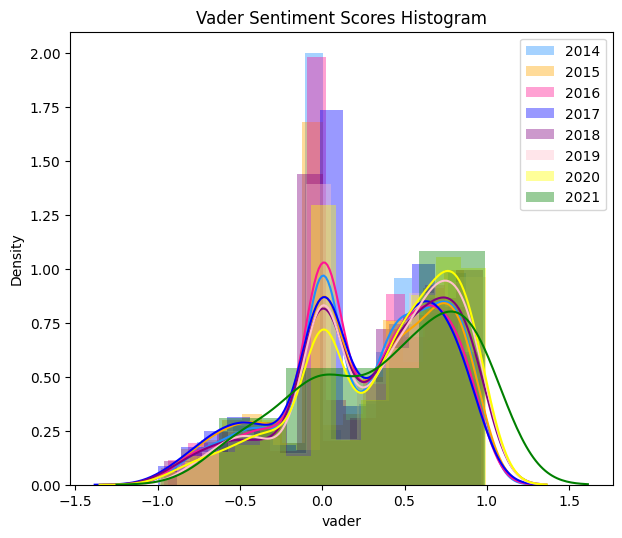

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(combined.loc[combined.year==2014, "vader"] , color="dodgerblue", label="2014")
sns.distplot(combined.loc[combined.year==2015, "vader"] , color="orange", label="2015")
sns.distplot(combined.loc[combined.year==2016, "vader"] , color="deeppink", label="2016")
sns.distplot(combined.loc[combined.year==2017, "vader"] , color="blue", label="2017")
sns.distplot(combined.loc[combined.year==2018, "vader"] , color="purple", label="2018")
sns.distplot(combined.loc[combined.year==2019, "vader"] , color="pink", label="2019")
sns.distplot(combined.loc[combined.year==2020, "vader"] , color="yellow", label="2020")
sns.distplot(combined.loc[combined.year==2021, "vader"] , color="green", label="2021")

plt.title('Vader Sentiment Scores Histogram')
plt.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


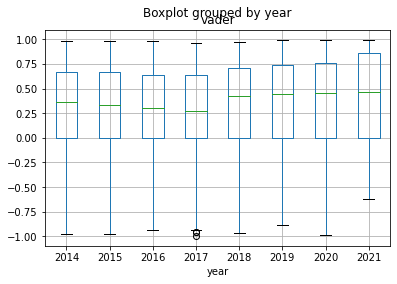

In [ ]:
%matplotlib inline
combined.boxplot('vader', by='year')

# TextBlob subjectivity score

In [ ]:
from textblob import TextBlob

combined['subjectivity'] = combined['text_preprocessed'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
combined

,date,tweet_id,text,year,text_preprocessed,vader,subjectivity,year_new
0,2014-12-31 21:46:43+00:00,5.500000e+17,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014,"I got brow gel, gimme brow, stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",0.4588,0.000000,2014
1,2014-12-31 08:29:37+00:00,5.500000e+17,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014,"You know your boyfriend is the best when he buys you urban decay eyeliner, highlighter/, and mascara by too faced 💕😘",0.8625,0.150000,2014
2,2014-12-31 04:31:35+00:00,5.500000e+17,And my Nars highlighting blush 💁,2014,And my highlighting 💁,0.4939,0.000000,2014
3,2014-12-31 00:16:59+00:00,5.500000e+17,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,2014,super orgasm is needed. Orgasm does nothing for me.. makeup,0.5994,0.666667,2014
4,2014-12-30 21:46:46+00:00,5.500000e+17,"I'm obsessed with the orgasm blush by NARS, it's perfection 😍😍😍",2014,"I'm obsessed with the orgasm by , it's perfection 😍😍😍",0.9001,1.000000,2014
...,...,...,...,...,...,...,...,...
59,2021-01-04 23:14:23+00:00,1.350000e+18,"@AaaclmyyAelny Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love Nars blush, and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",2021,"Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love , and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",0.9451,0.663636,2020
60,2021-01-04 16:03:41+00:00,1.350000e+18,"@NARSCosmetics Ohhh....myyyyyy...now this collection is screaming my name....hmm NARS U could have done better in selecting blush,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT &amp; SAID NO TO IT too U r REHASHING these MOTIFS",2021,"Ohhh....myyyyyy...now this collection is screaming my name....hmm U could have done better in selecting ,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT & SAID NO TO IT too U r REHASHING these MOTIFS",0.8109,0.500000,2020
61,2021-01-03 21:55:38+00:00,1.350000e+18,Bought the Nars Deep throat blush cause I’m como siempre bellaquita,2021,Bought the Deep throat cause I’m como siempre bellaquita,0.0000,0.400000,2020
62,2021-01-01 20:01:45+00:00,1.350000e+18,@mariofthemoon Thank you 🥺 NARS bronzer in Laguna &amp; Milani Baked Blush in Rose I think?,2021,Thank you 🥺 bronzer in Laguna & Milani Baked Blush in Rose I think?,0.3612,0.950000,2020


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


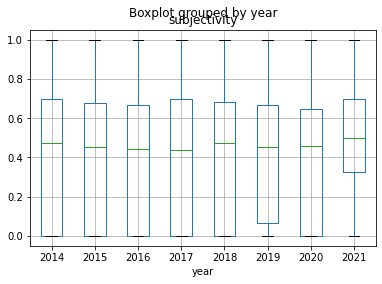

In [ ]:
%matplotlib inline
combined.boxplot('subjectivity', by='year')

In [ ]:
# group 2020 and 2021 tweets together --> since latest product review is considered as 'a year ago'
combined['year_new'] = combined.year.map({2014:2014, 2015:2015, 2016:2016, 2017:2017, 2018:2018, 2019:2019, 2020:2020, 2021:2020})
combined

,date,tweet_id,text,year,text_preprocessed,vader,subjectivity,year_new
0,2014-12-31 21:46:43+00:00,5.500000e+17,"@Barakatswhore I got brow gel, gimme brow, Nars blush stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",2014,"I got brow gel, gimme brow, stick and bronzer, kat Von d eyeshadow pallet, and a couple lip crayons from bite 😍",0.4588,0.000000,2014
1,2014-12-31 08:29:37+00:00,5.500000e+17,"You know your boyfriend is the best when he buys you urban decay eyeliner, Nars highlighter/blush, and mascara by too faced 💕😘",2014,"You know your boyfriend is the best when he buys you urban decay eyeliner, highlighter/, and mascara by too faced 💕😘",0.8625,0.150000,2014
2,2014-12-31 04:31:35+00:00,5.500000e+17,And my Nars highlighting blush 💁,2014,And my highlighting 💁,0.4939,0.000000,2014
3,2014-12-31 00:16:59+00:00,5.500000e+17,Nars super orgasm blush is needed. Orgasm does nothing for me.. #makeup,2014,super orgasm is needed. Orgasm does nothing for me.. makeup,0.5994,0.666667,2014
4,2014-12-30 21:46:46+00:00,5.500000e+17,"I'm obsessed with the orgasm blush by NARS, it's perfection 😍😍😍",2014,"I'm obsessed with the orgasm by , it's perfection 😍😍😍",0.9001,1.000000,2014
...,...,...,...,...,...,...,...,...
59,2021-01-04 23:14:23+00:00,1.350000e+18,"@AaaclmyyAelny Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love Nars blush, and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",2021,"Well. I like Nudestix a lot, especially their cheek/lip crayons. I like trying new mascaras, I have had good luck with Anastasia Beverly Hills, Laura Mercier, Too Faced. I love , and their multi sticks. Milani, or Ulta brand for eyeshadow primer.",0.9451,0.663636,2020
60,2021-01-04 16:03:41+00:00,1.350000e+18,"@NARSCosmetics Ohhh....myyyyyy...now this collection is screaming my name....hmm NARS U could have done better in selecting blush,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT &amp; SAID NO TO IT too U r REHASHING these MOTIFS",2021,"Ohhh....myyyyyy...now this collection is screaming my name....hmm U could have done better in selecting ,conture and highlighter shades....you could have truly done better in packageing too because ♥️⭐🦋SEEN IT,USED IT & SAID NO TO IT too U r REHASHING these MOTIFS",0.8109,0.500000,2020
61,2021-01-03 21:55:38+00:00,1.350000e+18,Bought the Nars Deep throat blush cause I’m como siempre bellaquita,2021,Bought the Deep throat cause I’m como siempre bellaquita,0.0000,0.400000,2020
62,2021-01-01 20:01:45+00:00,1.350000e+18,@mariofthemoon Thank you 🥺 NARS bronzer in Laguna &amp; Milani Baked Blush in Rose I think?,2021,Thank you 🥺 bronzer in Laguna & Milani Baked Blush in Rose I think?,0.3612,0.950000,2020


In [ ]:
combined.to_csv('tweets14-21_processed.csv', index=False)

In [ ]:
# aggregated sentiment scores
combined.groupby('year_new').mean().drop(['tweet_id','year'], axis=1)

,vader,subjectivity
year_new,,
2014,0.274153,0.439074
2015,0.253708,0.426396
2016,0.253013,0.419337
2017,0.231176,0.413557
2018,0.307571,0.429923
2019,0.342758,0.425779
2020,0.360757,0.422651


In [ ]:
vader_sent = {2008:0.325670, 2009:0.370515, 2010:0.361297, 2011:0.311339, 2012:0.310980, 2013:0.264015,
              2014:0.274153, 2015:0.253708, 2016:0.253013, 2017:0.231176, 2018:0.307571, 2019:0.342758, 2020:0.360757}
              
tb_subjectivity = {2008:0.446275, 2009:0.474194, 2010:0.486519, 2011:0.478604, 2012:0.467248, 2013:0.453749,
                   2014:0.439074, 2015:0.426396, 2016:0.419337, 2017:0.413557, 2018:0.429923, 2019:0.425779, 2020:0.422651}

# Test Functions

In [ ]:
# text = 'z 23rwqw a 34qf34 h 343fsdfd'
# ' '.join( [w for w in text.split() if len(w)>1] )

In [ ]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "Don't": "do not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)


In [ ]:
print(expandContractions("Don't you get it?"))
print(expandContractions("I ain't got time for y'alls foolishness"))

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# filter stopwords without changing the original text to lower case
# filtered_words = [w for w in final_wordlist if w.lower() not in stopwords_ger]

string = "I am HuNgry"


stop = stopwords.words('english')
" ".join(word for word in string.split() if word.lower() not in stop)


In [ ]:
test1 = TextBlob("Textblob is amazingly simple to use. What great fun.")
print(test1.sentiment)
test2 = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(test2.sentiment)
test3 = TextBlob("Textblob is amazingly simple to use. What great fun!!!!")
print(test3.sentiment)
test4 = TextBlob("TEXTBLOB IS AMAZINGLY SIMPLE TO USE. WHAT GREAT FUN!")
print(test4.sentiment)
test5 = TextBlob("Textblob is amazingly simple to use. What great fun! :)")
print(test5.sentiment)
test6 = TextBlob("Textblob is amazingly simple to use. What great fun! :(")
print(test6.sentiment)
test7 = TextBlob("Textblob amazingly simple use great fun")
print(test7.sentiment)
test8 = TextBlob("Textblob's amazingly simple to use. What great fun!!!!")
print(test8.sentiment)

## AFINN
AFINN has preprocesses the text by removing the punctuation, converting all the words to lower-case, and before analyzing it.
- *probably better to use VADER*

In [ ]:
# pip install afinn

In [ ]:
# from afinn import Afinn

In [ ]:
# afinn = Afinn(emoticons=True)
# combined['afinn'] = combined['text_preprocessed'].apply(lambda x: afinn.score(x))
# combined

In [ ]:
# %matplotlib inline
# combined.boxplot('afinn', by='year')